<a href="https://colab.research.google.com/github/najwacaesa/Mini-Project-DataMIning/blob/main/DataModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisis Penjualan Walmart untuk Mengoptimalkan Strategi Pemasaran**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

uniform_data = np.random.rand(10, 12)

**Library Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

**Library Normalisasi Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

**Library Build Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

##**BUSINESS UNDERSTANDING**

###**Business Objective**

Tujuan bisnis nya adalah untuk memahami bagaimana analisis data penjualan Walmart dapat mendukung pengambilan keputusan bisnis dan strategi pemasaran yang lebih efektif.

###**Assess Situation**

Walmart, salah satu retailer terbesar di dunia, menghadapi tekanan persaingan yang meningkat di pasar ritel global. Dalam upaya untuk tetap kompetitif dan mempertahankan pangsa pasar mereka, Walmart ingin meningkatkan efektivitas strategi pemasaran dan pengambilan keputusan mereka dengan memanfaatkan data penjualan yang tersedia

###**Data Mining Goals**

Tujuan data mining dataset ini yang pertama adalah untuk memahami pola penjualan dan dapat mengidentifikasi factor-faktor penentu penjualan untuk menentukan bagaimana elemen-elemen ini berdampak pada volume penjualan. Selain itu, tujuan data mining lainnya yaitu untuk memprediksi penjualan walmart ke depannya agar dapat membantu walmart dalam perencanaan persediaan, pengelolaan inventaris, dan hal-hal lainnya.

###**Project Plan**

Hal pertama yang harus dilakukan tentu saja dengan memahami proyek dan dilanjutkan dengan proses pengumpulan serta pemrosesan data. Setelah data diproses dilanjutkan dengan menganalisis data entah dari segi distribusi penjualan, tren penjualan, dan lainnya. Hal selanjutnya adalan pengimplementasian data dari hasil analisis sebelumnya dengan menggunakan stategi yang sesuai. Dan yang terakhir adalh melakukan evaluasi bagaimana kinerja strategi pemasaran dan pengambilan keputusan bisnis sebelumnya

##**DATA UNDERSTANDING**

##**Collect Initial Data**

Data yang saya gunakan pada project ini saya ambil dari https://www.kaggle.com/ dengan judul Walmart Sales, Berikut link dataset yang saya gunakan https://www.kaggle.com/datasets/mikhail1681/walmart-sales

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/najwacaesa/Mini-Project-DataMIning/main/Walmart_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


##**Describe Data**

###Informasi Dasar

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Pada Dataset ini memiliki 6435 Baris dan 8 Kolom, dengan nama kolom Store, Weekly Sales, Holiday Flag, Temperature, Fuel Price, CPI, dan Unemployment.

###Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


1. **Kolom Store** (Kolom ini menampilkan nomor store walmart yang ada)[Int]
2. **Kolom Date** (Kolom ini memberikan informasi kolom untuk menampilkan tanggal mulainya penjualan)[Object]
3. **Kolom Weekly_Sales** (Kolom ini memberikan informasi penjualan mingguan masinng-masing toko)[float]
4. **Kolom Holiday Flag** (Kolom ini menampilkan jumlah ada tidaknya hari libur) [Int]
5. **Kolom Temperature** (Kolom ini menampilkan suhu udara wilayah toko tersebut berada)[float]
6. **Kolom Fuel_Price** (Kolom ini memberikan informasi biaya bahan bakar di wilayah toko tersebut berada)[float]
7. **Kolom CPI**(Kolom ini memberikan informasi terkait Customer Price Index atau Indeks Harga Komsumen)[float]
8. **Kolom Unemployment** (Kolom ini menampilkan tingkat pengangguran dari masing-masing Toko)[float]

###Informasi Statistik Deskriptif

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Berikut penjelesan mengenai statistik deskriptif dari data diatas:

**1. Store**
Pada kolom store ini memiliki 6435 data dengan rata-rata 23, lalu kolom ini memiliki standar deviasi 12,988182. Nilai minimum kolom ini adalah 1 dan nilai maksimumnya adalah 45. Lalu nilai persentase 25% = 12, 50% (median) = 23, dan 75% = 34

 **2. Weekly_Sales**
 Pada kolom Weekly_Sales ini memiliki 6435 data dengan rata-rata 1.046965e+06, lalu kolom ini memiliki standar deviasi 5.643666e+05. Nilai minimum kolom ini adalah 2.099862e+05 dan nilai maksimumnya adalah 3.818686e+06. Lalu nilai persentase 25% = 5.533501e+05, 50% (median) = 9.607460e+05, dan 75% = 1.420159e+06

 **3. Holiday_Flag**
 Pada kolom Holiday_Flag ini memiliki 6435 data dengan rata-rata 0.069930, lalu kolom ini memiliki standar deviasi 0.255049. Nilai minimum kolom ini adalah 0 dan nilai maksimumnya adalah 1. Lalu nilai persentase 25% = 0, 50% (median) = 0, dan 75% = 0

  **4. Temperature**
  Pada kolom Temperature ini memiliki 6435 data dengan rata-rata 60.663782, lalu kolom ini memiliki standar deviasi 18.444933. Nilai minimum kolom ini adalah -2.060000 dan nilai maksimumnya adalah 100.140000. Lalu nilai persentase 25% = 47,46, 50% (median) = 62,67, dan 75% = 74,94.

  **5. Fuel_Price**
   Pada kolom Fuel Price ini memiliki 6435 data dengan rata-rata 3.358607, lalu kolom ini memiliki standar deviasi 0.459020. Nilai minimum kolom ini adalah 2.472000	 dan nilai maksimumnya adalah 4.468000. Lalu nilai persentase 25% = 2.933000, 50% (median) = 3.445000, dan 75% = 3.735000.

   **6. CPI**
   Pada kolom CPI (Customer Price Index) ini memiliki 6435 data dengan rata-rata 171.578394, lalu kolom ini memiliki standar deviasi 39.356712. Nilai minimum kolom ini adalah 126.064000 dan nilai maksimumnya adalah 227.232807. Lalu nilai persentase 25% = 131.735000, 50% (median) = 182.616521, dan 75% = 212.743293.

   **7. Unemployment**
   Pada kolom Unemployment ini memiliki 6435 data dengan rata-rata 7.999151, lalu kolom ini memiliki standar deviasi 1.875885. Nilai minimum kolom ini adalah 3.879000 dan nilai maksimumnya adalah 14.313000. Lalu nilai persentase 25% = 6.891000, 50% (median) = 7.874000, dan 75% = 8.622000.


##**Exploratory Data Analysis**

### Korelasi Antar Kolom

In [ ]:
import plotly.express as px

In [ ]:
px.imshow(df.corr(numeric_only=True))

**Korelasi Kolom Store dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Store' sebesar 1
*   Korelasi Kolom antar 'Weekly_Sales' & 'Store' sebesar -0,335
*   Korelasi Kolom antar 'Holiday_Flag' & 'Store' sebesar -4,386
*   Korelasi Kolom antar 'Temperature'  & 'Store' sebesar -0,022
*   Korelasi Kolom antar 'Fuel_Price' & 'Store' sebesar 0.060
*   Korelasi Kolom antar 'CPI' & 'Store' sebesar -0,209
*   Korelasi Kolom antar 'Unemployment' & 'Store' sebesar 0,223

**Korelasi Kolom Weekly Sales dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Weekly_Sales' sebesar -0,335
*   Korelasi Kolom antar 'Weekly_Sales' & 'Weekly_Sales' sebesar 1
*   Korelasi Kolom antar 'Holiday_Flag' & 'Weekly_Sales' sebesar 0,036
*   Korelasi Kolom antar 'Temperature'  & 'Weekly_Sales' sebesar -0,063
*   Korelasi Kolom antar 'Fuel_Price' & 'Weekly_Sales' sebesar 0.009
*   Korelasi Kolom antar 'CPI' & 'Weekly_Sales' sebesar -0,072
*   Korelasi Kolom antar 'Unemployment' & 'Weekly_Sales' sebesar -0,106

**Korelasi Kolom Holiday Flag dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Holiday_Flag' sebesar -4,836
*   Korelasi Kolom antar 'Weekly_Sales' & 'Holiday_Flag' sebesar 0,036
*   Korelasi Kolom antar 'Holiday_Flag' & 'Holiday_Flag' sebesar 1
*   Korelasi Kolom antar 'Temperature'  & 'Holiday_Flag' sebesar -0,155
*   Korelasi Kolom antar 'Fuel_Price' & 'Holiday_Flag' sebesar -0.078
*   Korelasi Kolom antar 'CPI' & 'Holiday_Flag' sebesar -0,002
*   Korelasi Kolom antar 'Unemployment' & 'Holiday_Flag' sebesar 0,010

**Korelasi Kolom Temperature dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Temperature' sebesar -0,022
*   Korelasi Kolom antar 'Weekly_Sales' & 'Temperature' sebesar -0,063
*   Korelasi Kolom antar 'Holiday_Flag' & 'Temperature' sebesar -0,155
*   Korelasi Kolom antar 'Temperature'  & 'Temperature' sebesar 1
*   Korelasi Kolom antar 'Fuel_Price' & 'Temperature' sebesar 0.144
*   Korelasi Kolom antar 'CPI' & 'Temperature' sebesar 0,176
*   Korelasi Kolom antar 'Unemployment' & 'Temperature' sebesar 0,101

**Korelasi Kolom Fuel_Price dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Fuel_Price' sebesar 0,060
*   Korelasi Kolom antar 'Weekly_Sales' & 'Fuel_Price' sebesar 0,009
*   Korelasi Kolom antar 'Holiday_Flag' & 'Fuel_Price' sebesar -0,076
*   Korelasi Kolom antar 'Temperature'  & 'Fuel_Price' sebesar 0.144
*   Korelasi Kolom antar 'Fuel_Price' & 'Fuel_Price' sebesar 1
*   Korelasi Kolom antar 'CPI' & 'Fuel_Price' sebesar -0,170
*   Korelasi Kolom antar 'Unemployment' & 'Fuel_Price' sebesar -0,034

**Korelasi Kolom CPI dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'CPI' sebesar -0,209
*   Korelasi Kolom antar 'Weekly_Sales' & 'CPI' sebesar -0,072
*   Korelasi Kolom antar 'Holiday_Flag' & 'CPI' sebesar -0,002
*   Korelasi Kolom antar 'Temperature'  & 'CPI' sebesar 0.176
*   Korelasi Kolom antar 'Fuel_Price' & 'CPI' sebesar 0,170
*   Korelasi Kolom antar 'CPI' & 'CPI' sebesar 1
*   Korelasi Kolom antar 'Unemployment' & 'CPI' sebesar -0,302

**Korelasi Kolom Unemployment dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Unemployment' sebesar 0,223
*   Korelasi Kolom antar 'Weekly_Sales' & 'Unemployment' sebesar -0,106
*   Korelasi Kolom antar 'Holiday_Flag' & 'Unemployment' sebesar 0.010
*   Korelasi Kolom antar 'Temperature'  & 'Unemployment' sebesar -0,101
*   Korelasi Kolom antar 'Fuel_Price' & 'Unemployment' sebesar -0,034
*   Korelasi Kolom antar 'CPI' & 'Unemployment' sebesar -0,302
*   Korelasi Kolom antar 'Unemployment' & 'Unemployment' sebesar 1

###Tingkat Pengangguran Pada Walmart

Text(0.5, 1.0, 'Tingkat Pengangguran Pada Walmart')

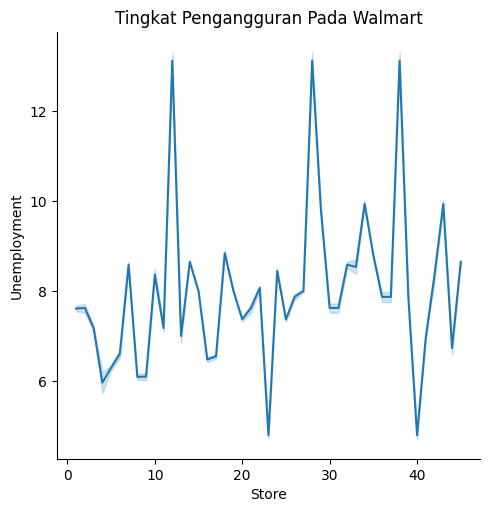

In [ ]:
sns.relplot(x='Store', y='Unemployment', data=df, kind='line')
plt.xlabel('Store')
plt.ylabel('Unemployment')
plt.title('Tingkat Pengangguran Pada Walmart')

Dapat dilihat pada diagram diatas pada beberapa toko memiliki tingkat pengangguran yang sangat tinggi, tetapi ada juga toko dengan tingkat pengangguran yang sangat kecil

###Jumlah Hari libur Toko

<Axes: ylabel='Holiday_Flag'>

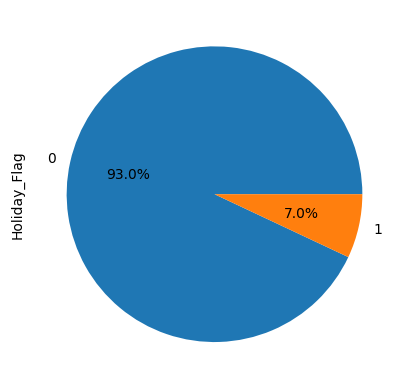

In [ ]:
Holiday_Flag = df['Holiday_Flag'].value_counts()
Holiday_Flag.plot(kind='pie', autopct='%1.1f%%', startangle=360)

Dari diagram diatas dapat disimpulkan bahwa sebagian besar toko Walmart tidak ada hari libur, hanya ada 7,0% yang memiliki 1 hari libur tokonya.

### Pengaruh Hari Libur Terhadap Penjualan Mingguan

Text(0.5, 1.0, 'Pengaruh Hari Libur tehadap Penjualan Mingguan')

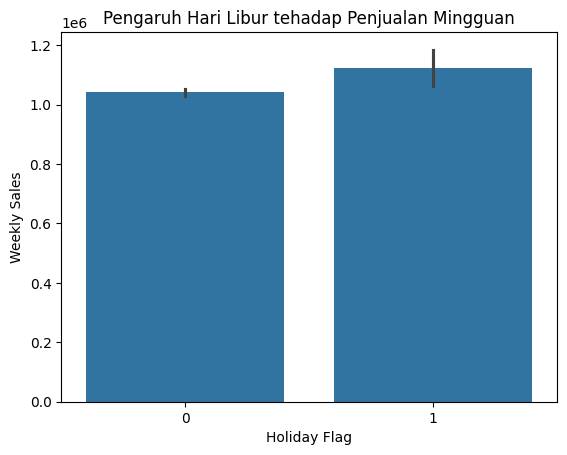

In [ ]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.title('Pengaruh Hari Libur tehadap Penjualan Mingguan')

Dapat dilihat bahwa pada toko yang memiliki hari libur mempunyai penjualan mingguan yang lebih tinggi dibandingkan toko yang tidak mempunyai hari libur.

##**Verify Data Quality**

###Missing Values

In [ ]:
df.isna()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Berdasarkan hasil analisis awal diatas,terlihat bahwa tidak ada missing values atau data yang hilang pada data tersebut

###Outliers Values

In [ ]:
def detect_outliers(column):
    column = pd.to_numeric(column, errors='coerce')

    column = column.dropna()

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

    percentage_outliers = outliers.sum() / len(column) * 100

    return outliers, percentage_outliers

for column in df.columns:
    outliers, percentage_outliers = detect_outliers(df[column])

    print(f"Kolom '{column}':")
    print(f"  - Jumlah outliers: {outliers.sum()}")
    print(f"  - Persentase kehadiran outliers: {percentage_outliers:.2f}%")
    print()

Kolom 'Store':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'Date':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'Weekly_Sales':
  - Jumlah outliers: 34
  - Persentase kehadiran outliers: 0.53%

Kolom 'Holiday_Flag':
  - Jumlah outliers: 450
  - Persentase kehadiran outliers: 6.99%

Kolom 'Temperature':
  - Jumlah outliers: 3
  - Persentase kehadiran outliers: 0.05%

Kolom 'Fuel_Price':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'CPI':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'Unemployment':
  - Jumlah outliers: 481
  - Persentase kehadiran outliers: 7.47%



<ipython-input-245-13b4bbc91115>:12: RuntimeWarning:

invalid value encountered in scalar divide



Berikut jumlah ouliners dari masing-masing kolom:
1. **Kolom Store** : Memiliki 0 Outliners dengan persentase 0%
2. **Kolom Date** : Memiliki 0 Outliners dengan persentase 0%
3. **Kolom Weekly_Sales** : Memiliki 34 Outliners dengan persentase 0,53%
4. **Kolom Holiday_Flag** : Memiliki 450 Outliners dengan persentase 6,99%
5. **KoloM Temperature** : Memiliki 3 Outliners dengan persentase 0,05%
6. **Kolom Fuel_Price** : Memiliki 0 Outliners dengan persentase 0%
7. **Kolom CPI** : Memiliki 0 Ouliners dengan persentase 0%
8. **Kolom Unemployment** : Memiliki 481 Outliners dengan persentase 7,47%


###Duplicated Values

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

Berdasarkan hasil analisis awal pada data diatas, dapat disimpulkan bahwa sebagian besar tidak terdapat duplicated values atau nilai yang terduplikat pada data tersebut.

#**DATA PREPARATION**

##**Data Cleaning**

###**Penanganan Missing Value**

**Pengecekkan Missing Value**

In [ ]:
print((df.isna().sum() / len(df)) * 100)

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64


Pada data ini tidak terdapat missing value, sehingga tidak diperlukannya penanganan lebih lanjut

### **Penanganan Duplicated Value**

**Pengecekkan Nilai Duplikat**

In [ ]:
df[df.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

Pada data ini tidak terdapat adanya nilai duplikat atau duplicated value, sehingga tidak perlu dilakukannya penghapusan nilai duplikat

### **Penanganan Outliners**

**Pengecekkan outliners**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Store,0.000000
Weekly_Sales,0.528361
Holiday_Flag,6.993007
Temperature,0.046620
Fuel_Price,0.000000
CPI,0.000000
Unemployment,7.474747


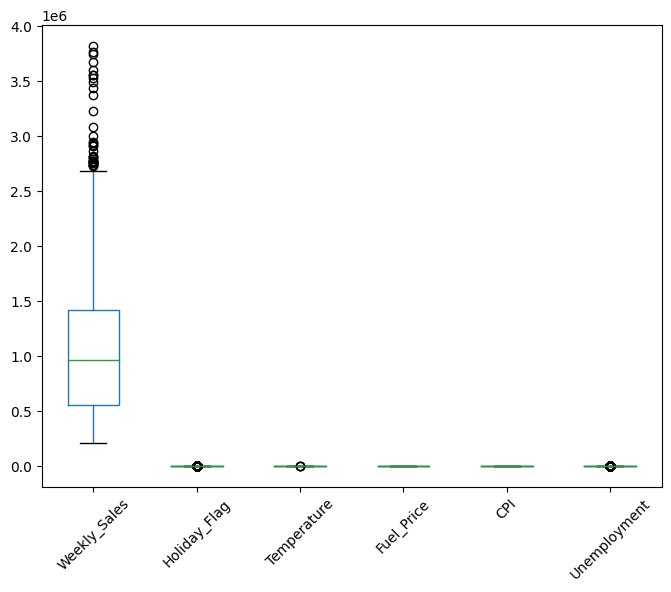

In [ ]:
boxplot = df.drop('Store', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Berdasarkan hasil pengecekkan, terdapat outliners pada kolom Weekly_Sales sebanyak 0.528361%, Holiday_Flag sebanyak 6,993007%, Temperature sebanyak 0,046620%, dan Unemployment sebanyak 7,474747%

**Penghapusan Nilai Outliners**

In [ ]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Weekly_Sales'] >= lower_bound) & (df['Weekly_Sales'] <= upper_bound)]

In [ ]:
Q1 = df['Holiday_Flag'].quantile(0.25)
Q3 = df['Holiday_Flag'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Holiday_Flag'] >= lower_bound) & (df['Holiday_Flag'] <= upper_bound)]

**Imputasi Outliners**

In [ ]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Temperature']=np.where(df['Temperature']>upper_whisker,upper_whisker,np.where(df['Temperature']<lower_whisker,lower_whisker,df['Temperature']))

In [ ]:
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Unemployment']=np.where(df['Unemployment']>upper_whisker,upper_whisker,np.where(df['Unemployment']<lower_whisker,lower_whisker,df['Unemployment']))

Untuk membersihkan data atau cleaning data maka perlu diadakannya penghapusan atau imputasi outliners pada kolom-kolom yang terdapat outliners

**Pengecekkan Ulang**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Store,0.0
Weekly_Sales,0.0
Holiday_Flag,0.0
Temperature,0.0
Fuel_Price,0.0
CPI,0.0
Unemployment,0.0


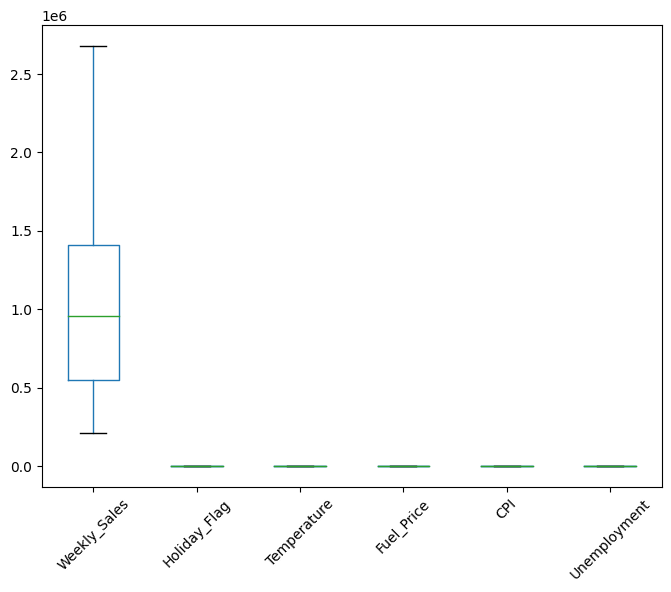

In [ ]:
boxplot = df.drop('Store', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Setelah berhasil dilakukan nya penghapusan outliner, maka fapat dilihat sudah tidak terdapat outliners di semua kolom

## **Construct Data**

### **Melakukan Rekayasa Fitur (Feature Engineering)**

In [ ]:
def Sales_Category(Weekly_Sales):
    if Weekly_Sales < 1409727.59:
        return 'Low'
    elif 1409727.59 <= Weekly_Sales < 1554806.68:
        return 'Medium'
    else:
        return 'High'

df['Sales_Category'] = df['Weekly_Sales'].apply(Sales_Category)

Pada tahap Feature Enggineering ini kita akan menambahkan kolom "Sales_Category" yang meruapakan kolom untuk mengukur Penjualan Mingguan Walmart apakah rendah, sedang, atau tinggi

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Definisikan fungsi untuk mengembalikan tahun berdasarkan tanggal
def Year(Date):
    if Date <= pd.Timestamp("2010-12-31"):
        return '2010'
    elif pd.Timestamp("2010-12-31") < Date <= pd.Timestamp("2011-12-31"):
        return '2011'
    elif pd.Timestamp("2011-12-31") < Date <= pd.Timestamp("2012-12-31"):
        return '2012'

# Terapkan fungsi Year pada kolom 'Date' dan simpan hasilnya dalam kolom 'Year'
df['Year'] = df['Date'].apply(Year)

<ipython-input-258-5be7166324f0>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



Selain itu satya menambahkan kolom baru yaitu kolom "Year" untuk memudahkan pencarian tahun dari masing masing cabang walmart

### **Pengecekkan Hasil**

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales_Category,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,High,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,High,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Medium,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,High,2010
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,Medium,2010


Setelah berhasil, maka akan muncul kolom baru pada data kita

## **Data Reduction**

### **Mengurangi fitur-fitur yang kurang relevan**

In [ ]:
df = df.drop(['Holiday_Flag'], axis=1)

Alasan mengapa kolom ini dihapus dikarenakan meskipun kolom ini menandakan apakah hari tersebut adalah hari libur atau bukan, tidak semua hari libur memiliki dampak besar terhadap penjualan Walmart.

### **Pengecekkan Hasil**

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Sales_Category,Year
0,1,2010-05-02,1643690.90,42.31,2.572,211.096358,8.106,High,2010
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,High,2010
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,Medium,2010
4,1,2010-05-03,1554806.68,46.50,2.625,211.350143,8.106,High,2010
5,1,2010-12-03,1439541.59,57.79,2.667,211.380643,8.106,Medium,2010


## **Data Transformation**

### **Mapping**

In [ ]:
df['Sales_Category'] = df['Sales_Category'].map({'Low':0,'Medium':1, 'High':2}).astype(int)
df['Year'] = df['Year'].map({'2010':0, '2011':1, '2012':2}).astype(int)
df['Year'] = df['Year'].astype(int)

In [ ]:
df

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Sales_Category,Year
0,1,2010-05-02,1643690.90,42.31,2.572,211.096358,8.106,2,0
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,2,0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,1,0
4,1,2010-05-03,1554806.68,46.50,2.625,211.350143,8.106,2,0
5,1,2010-12-03,1439541.59,57.79,2.667,211.380643,8.106,1,0
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,64.88,3.997,192.013558,8.684,0,2
6431,45,2012-05-10,733455.07,64.89,3.985,192.170412,8.667,0,2
6432,45,2012-12-10,734464.36,54.47,4.000,192.327265,8.667,0,2
6433,45,2012-10-19,718125.53,56.47,3.969,192.330854,8.667,0,2


Pada tahapan data tranformation ini kita akan mengubah Format dari kolom yang belum numerik. Disini saya mengubah Format dari kolom Sales_Category, Year, dan Date menajdi seperti dibawah ini:

**Sales Category**
1.  Low menjadi 0
2.  Medium menjadi 1
3.  High menjadi 2

**Year**

1.   2010 menjadi 0
2.   2011 menjadi 1
3.   2012 menjadi 2


**Date**
Mengubah tipe datanya menjadi interger

### **Encoding**

In [ ]:
df = pd.get_dummies(df)

Proses encoding ini berfungsi untuk mengubah data kategorikal menjadi numerikal

### **Pengecekkan Hasil**

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Sales_Category,Year
0,1,2010-05-02,1643690.90,42.31,2.572,211.096358,8.106,2,0
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,2,0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,1,0
4,1,2010-05-03,1554806.68,46.50,2.625,211.350143,8.106,2,0
5,1,2010-12-03,1439541.59,57.79,2.667,211.380643,8.106,1,0


In [ ]:
df.to_csv("Data Cleaned.csv")

##**MODELLING**

### **Modelling Predict**

Prediction pada umumnya dianggap sebagai tindakan yang menjelaskan mengenai masa mendatang.  Hal ini berbeda dengan menebak secara sederhana dengan mempertimbangkan pengalaman, opini, dan informasi lainnya dalam melakukan peramalan.  Istilah yang umumnya dikaitkan dengan ‘prediction’ adalah ‘forecasting’.

Berikut beberapa tujuan pengguanaan modeliing Predict terhadap analisis penjualan Walmart:

1. **Menggunakan data yang ada sebelumnya untuk memprediksi penjualan yang akan datang**: Salah satu tujuan utama dari model prediksi adalah untuk memprediksi penjualan di masa depan berdasarkan data yang ada sebelumnya. Dengan demikian, model dapat membantu dalam perencanaan persediaan, pemasaran, dan pengelolaan rantai pasok untuk memenuhi permintaan konsumen yang diperkirakan.
2. **Pengambilan Keputusan Berbasis Data:** Model prediksi dapat digunakan sebagai alat bantu bagi manajer dan pemangku kepentingan lainnya dalam pengambilan keputusan. Dengan mengandalkan prediksi yang diberikan oleh model, keputusan bisnis dapat dibuat secara lebih objektif dan berbasis data.

3. **Evaluasi Kinerja dan Perencanaan Masa Depan:** Dengan membandingkan hasil prediksi dengan data aktual, kita dapat mengevaluasi kinerja model dan memperbaiki model untuk masa depan. Hasil prediksi juga dapat digunakan sebagai dasar untuk perencanaan dan strategi bisnis di masa depan.


### **Pre-Processing**

**Split Data**

In [ ]:
x = df.drop('Sales_Category', axis=1)
y = df['Sales_Category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Syntax diatas adalah langkah-langkah untuk membagi dataset menjadi data pelatihan (training set) dan data uji (test set) menggunakan fungsi train_test_split dari modul sklearn.model_selection. Pada kasus ini data yang dibagi menjadi dua adalah data dari Sales Category yang digunakan untuk memprediksi kategori penjualan mingguan walmart.

**Normalisasi Data**

In [ ]:
x_train = x_train.drop(columns=['Date'])
x_test = x_test.drop(columns=['Date'])

scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

Pada Normalisasi ini,kolom date dihapus dikarenakan tipe data "Date" yang tidak bisa digunakan karena bukan merupakan numerik. Normalisasi sebdiri adalah proses untuk mengubah nilai-nilai dari fitur-fitur dalam suatu dataset sehingga memiliki skala yang seragam. Dengan melakukan normalisasi, rentang nilai dari setiap fitur akan diubah menjadi 0 hingga 1, yang mempermudah pemrosesan dan analisis data.

### **Build and Train Model**

**Gaussian Naive Bayes**

In [ ]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

Syntax tersebut digunakan untuk membuat model Gaussian Naive Bayes (GNB) menggunakan data training yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train).

**K-Nearest Neighbor**

In [ ]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()


Syntax ini digunakan untuk membuat model K-Nearest Neighbors (KNN) menggunakan data training yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train), serta melatih model tersebut.

**Decision Tree**

In [ ]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Syntax tersebut digunakan untuk membuat model Decision Tree Classifier (DTC) menggunakan data training yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train), serta melatih model tersebut.

### **Begins and Compare Predict**

In [ ]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [ ]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [ ]:
combined_data.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Year,Sales_Category,gnb_prediction,knn_prediction,dtc_prediction
0,11,1250178.89,83.26,2.640,214.695346,7.3460,0,0,0,0,0
1,5,359206.21,60.66,3.630,221.434215,5.9430,2,0,0,0,0
2,45,753447.05,55.82,3.583,187.483796,8.5230,1,0,0,0,0
3,23,1552886.59,43.60,3.501,136.490933,4.4200,1,1,1,0,1
4,12,945823.65,50.43,3.599,130.157516,11.2185,2,0,0,0,0


Berdasarkan hasil prediksi diatas dari ketiga model dapat disimpulkan tidak berbeda jauh. Sales Category pada Store 11 berhasil diprekdiksi dengan benar oleh ketiga model, begitu pula dengan store 5 , 45, dan 12. Tetapi pada store 23 KNN memiliki prediksi berbeda yakni 0.

**Visualisasi**

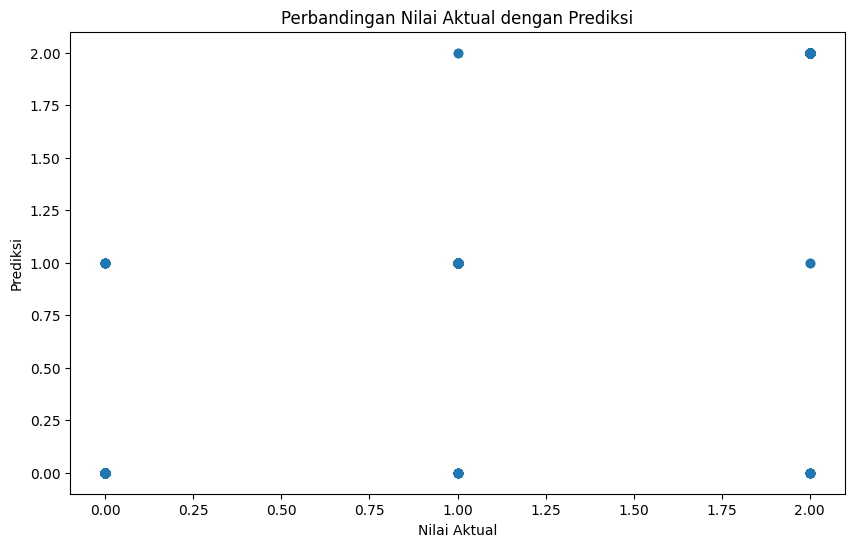

In [ ]:
predictions = gnb.predict(x_test_norm)

# Plotting nilai aktual vs. prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Perbandingan Nilai Aktual dengan Prediksi')
plt.show()

Dari scatter plot di atas, kita dapat melihat bahwa sebagian besar titik terletak dekat dengan garis diagonal, yang menunjukkan bahwa prediksi model cenderung mendekati nilai aktual. Ini menunjukkan bahwa model memiliki kemampuan untuk memprediksi penjualan dengan baik dalam sebagian besar kasus.